In [945]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [946]:
df = pd.read_csv('Housing-1.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [947]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [948]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [949]:
df.describe(include=[object])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [950]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

multi_class_column = 'furnishingstatus'

le = LabelEncoder()

for col in binary_columns:
    df[col] = le.fit_transform(df[col])

df[multi_class_column] = le.fit_transform(df[multi_class_column])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [951]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [952]:
scaler = MinMaxScaler()
df[['area']] = scaler.fit_transform(df[['area']])


In [953]:
X = df.drop(columns=['price']) 
y = df['price'] 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

In [954]:
X_train = torch.tensor(X_train.values).float()
y_train = torch.tensor(y_train.values).float().unsqueeze(1)

X_val = torch.tensor(X_val.values).float()
y_val = torch.tensor(y_val.values).float().unsqueeze(1)

In [955]:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.numpy()).flatten()
y_val = scaler_y.transform(y_val.numpy()).flatten()

y_train = torch.tensor(y_train).float().unsqueeze(1)
y_val = torch.tensor(y_val).float().unsqueeze(1)

In [956]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, 1), 
        )

    def forward(self, x):
        return self.linear(x)

input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

In [957]:
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

num_epochs = 2000

for epoch in range(num_epochs):
    model.train()
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()  
    loss.backward()
    optimizer.step()

    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/2000], Loss: 1.6765
Epoch [20/2000], Loss: 1.4027
Epoch [30/2000], Loss: 1.1353
Epoch [40/2000], Loss: 0.9551
Epoch [50/2000], Loss: 0.8251
Epoch [60/2000], Loss: 0.7339
Epoch [70/2000], Loss: 0.6709
Epoch [80/2000], Loss: 0.6282
Epoch [90/2000], Loss: 0.5981
Epoch [100/2000], Loss: 0.5765
Epoch [110/2000], Loss: 0.5600
Epoch [120/2000], Loss: 0.5468
Epoch [130/2000], Loss: 0.5357
Epoch [140/2000], Loss: 0.5260
Epoch [150/2000], Loss: 0.5172
Epoch [160/2000], Loss: 0.5092
Epoch [170/2000], Loss: 0.5017
Epoch [180/2000], Loss: 0.4947
Epoch [190/2000], Loss: 0.4881
Epoch [200/2000], Loss: 0.4818
Epoch [210/2000], Loss: 0.4758
Epoch [220/2000], Loss: 0.4702
Epoch [230/2000], Loss: 0.4647
Epoch [240/2000], Loss: 0.4596
Epoch [250/2000], Loss: 0.4546
Epoch [260/2000], Loss: 0.4499
Epoch [270/2000], Loss: 0.4454
Epoch [280/2000], Loss: 0.4411
Epoch [290/2000], Loss: 0.4370
Epoch [300/2000], Loss: 0.4331
Epoch [310/2000], Loss: 0.4293
Epoch [320/2000], Loss: 0.4257
Epoch [330/2000],

In [958]:
model.eval()  
y_pred = model(X_val).detach().numpy()

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'MSE: {mse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}')


MSE: 0.2296, MAE: 0.3896, R-squared: 0.7628


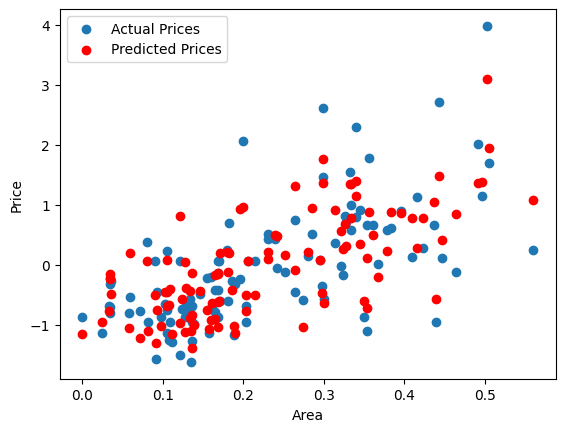

In [959]:
y_pred = model(X_val).detach().numpy()

plt.scatter(X_val[:, 0], y_val, label='Actual Prices')  
plt.scatter(X_val[:, 0], y_pred, label='Predicted Prices', color='red')
plt.xlabel('Area')  
plt.ylabel('Price')
plt.legend()
plt.show()
